**Ecommerce Trend anlysis**



*   Important Libraries setup





In [ ]:
# Importing all the needed libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



*   Data setup(loading Data set), real life dataset from downloaded from kaggle




In [ ]:
listoforders = pd.read_csv('List of Orders.csv')  # loading csv files
orderDetails = pd.read_csv('Order Details.csv')
#dataset is has details about sales from Indian e-commerce website.

In [ ]:
Data = pd.merge(listoforders, orderDetails, on='Order ID' ,how ='outer') # merged files for detailed analysis
print(Data)

     Order ID  Order Date CustomerName        State       City  Amount  \
0     B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad  1275.0   
1     B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad    66.0   
2     B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad     8.0   
3     B-25601  01-04-2018       Bharat      Gujarat  Ahmedabad    80.0   
4     B-25602  01-04-2018        Pearl  Maharashtra       Pune   168.0   
...       ...         ...          ...          ...        ...     ...   
1555      NaN         NaN          NaN          NaN        NaN     NaN   
1556      NaN         NaN          NaN          NaN        NaN     NaN   
1557      NaN         NaN          NaN          NaN        NaN     NaN   
1558      NaN         NaN          NaN          NaN        NaN     NaN   
1559      NaN         NaN          NaN          NaN        NaN     NaN   

      Profit  Quantity     Category      Sub-Category  
0    -1148.0       7.0    Furniture         Bookcases  



*   Data understanding and cleaning


In [ ]:
print(Data.shape)
Data.dropna(inplace=True)
print(Data.shape)
# deleting the empty rows, checking data before and after deleting the empty rows and columns

(1560, 10)
(1500, 10)


In [ ]:
Data.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7.0,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3.0,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4.0,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2.0,Electronics,Phones


In [ ]:
Data.head(1500)

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7.0,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5.0,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3.0,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4.0,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2.0,Electronics,Phones
...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,30-03-2019,Bhishm,Maharashtra,Mumbai,835.0,267.0,5.0,Electronics,Phones
1496,B-26099,30-03-2019,Bhishm,Maharashtra,Mumbai,2366.0,552.0,5.0,Clothing,Trousers
1497,B-26100,31-03-2019,Hitika,Madhya Pradesh,Indore,828.0,230.0,2.0,Furniture,Chairs
1498,B-26100,31-03-2019,Hitika,Madhya Pradesh,Indore,34.0,10.0,2.0,Clothing,T-shirt


In [ ]:
Data.info()
print(Data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Order Date    1500 non-null   object 
 2   CustomerName  1500 non-null   object 
 3   State         1500 non-null   object 
 4   City          1500 non-null   object 
 5   Amount        1500 non-null   float64
 6   Profit        1500 non-null   float64
 7   Quantity      1500 non-null   float64
 8   Category      1500 non-null   object 
 9   Sub-Category  1500 non-null   object 
dtypes: float64(3), object(7)
memory usage: 128.9+ KB
0


In [ ]:
Data['Order Date'] = pd.to_datetime(Data['Order Date'], format='%d-%m-%Y') #understanding Data

print ("Data information about size, datatypes and index")
print(Data.info())

print("No. of Order placed from each order ID") #Info. for basis understanding of number of times each order was placed from the particular OrderID
print(Data.value_counts('Order ID'))
Data.value_counts('Order ID').info()

print("\n\norders placed on each day")  #Info for understanding the No. of orders placed on each date
print(Data.value_counts('Order Date'))
Data.value_counts('Order Date').info()

print(" The number of times Each customer has placed Orders ")
print(Data.value_counts('CustomerName'))
Data.value_counts('CustomerName').info()

Data information about size, datatypes and index
<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1500 non-null   object        
 1   Order Date    1500 non-null   datetime64[ns]
 2   CustomerName  1500 non-null   object        
 3   State         1500 non-null   object        
 4   City          1500 non-null   object        
 5   Amount        1500 non-null   float64       
 6   Profit        1500 non-null   float64       
 7   Quantity      1500 non-null   float64       
 8   Category      1500 non-null   object        
 9   Sub-Category  1500 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 128.9+ KB
None
No. of Order placed from each order ID
Order ID
B-26056    12
B-25656    12
B-25999    11
B-25757    11
B-25651    10
           ..
B-25647     1
B-25646     1
B-25644    

Quick Insights

1.   No. of total sales = 1500
2.   Max. sales done in a day  = 33
3.   Min. sales done in a day = 1 or 0 ( there may be days with zero sales)
4.   some mismatch in the Order ID.s and No. of Customers

Number of transactions per day:


,Order Date,Transaction Count
0,2018-04-01,9
1,2018-04-03,10
2,2018-04-05,1
3,2018-04-06,2
4,2018-04-08,4
...,...,...
302,2019-03-27,13
303,2019-03-28,14
304,2019-03-29,6
305,2019-03-30,4



Average number of transactions per day: 4.89
Standard deviation of transactions per day: 5.07
Median number of transactions per day: 4.00


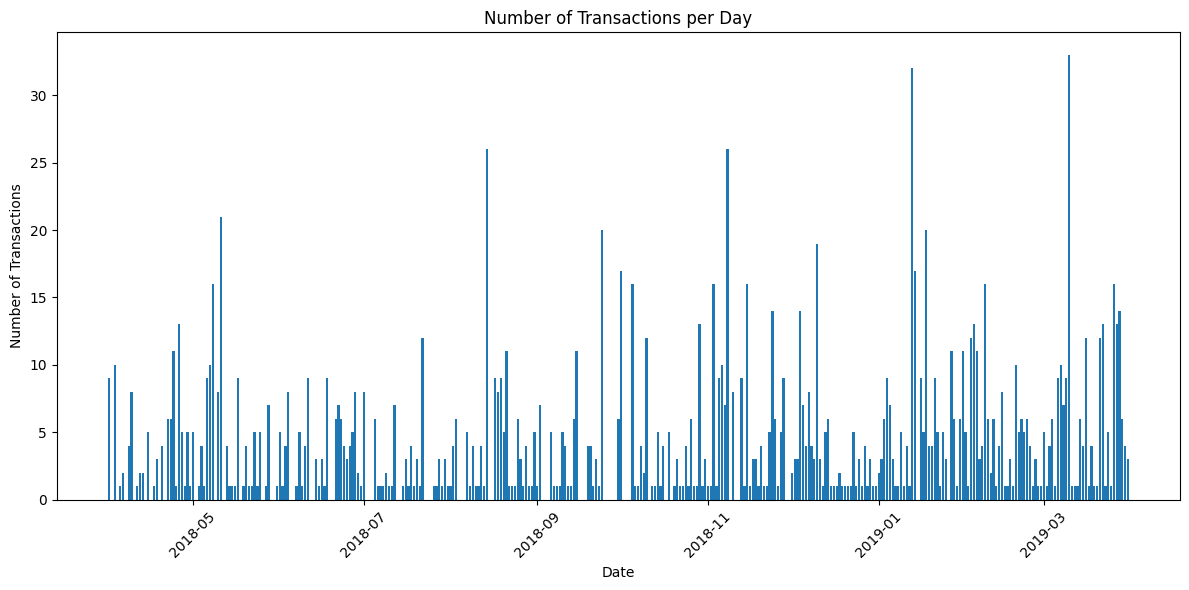

In [ ]:
# Group by Order Date and count transactions for clear observations and analysis
transactions_per_day = Data.groupby('Order Date').size().reset_index(name='Transaction Count')

print("Number of transactions per day:")
display(transactions_per_day)

# Calculate and checking statistical summary of transactions per day
average_transactions_per_day = transactions_per_day['Transaction Count'].mean()
print(f"\nAverage number of transactions per day: {average_transactions_per_day:.2f}")

deviation_transactions_per_day = transactions_per_day['Transaction Count'].std()
print(f"Standard deviation of transactions per day: {deviation_transactions_per_day:.2f}")

median_transactions_per_day = transactions_per_day['Transaction Count'].median()
print(f"Median number of transactions per day: {median_transactions_per_day:.2f}")

# Visualize the number of transactions per day
plt.figure(figsize=(12, 6))
plt.bar(transactions_per_day['Order Date'], transactions_per_day['Transaction Count'])
plt.title('Number of Transactions per Day')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Quick Insights*
1.   Average transactions in a day = 4
2.   Highest No. of transactions(sales) in a day i.e.,**33** occured on        2019-03-10


Questions for further analysis:
1. what are the monthly, quarterly, daily, weekly sales?
2. Is there any correlation between the order date and sales made?
3. why  sales  peaked on 2019-03-10? was it a festival, weekend?



 Grouping transactions(sales) based on the return made by each transactions.
  

In [ ]:
''' categorizing the transactions on the basis of the profit & loss it generates, so that i can later look at the sales( transactions)
which made the loss or zero profit , sales over time '''
loss_transactions = Data[Data['Profit'] < 0]
zero_profit_transactions = Data[Data['Profit'] == 0]
Profit_transactions = Data[Data['Profit']>0]


loss_transactions.info()
zero_profit_transactions.info()
Profit_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 0 to 1486
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      503 non-null    object        
 1   Order Date    503 non-null    datetime64[ns]
 2   CustomerName  503 non-null    object        
 3   State         503 non-null    object        
 4   City          503 non-null    object        
 5   Amount        503 non-null    float64       
 6   Profit        503 non-null    float64       
 7   Quantity      503 non-null    float64       
 8   Category      503 non-null    object        
 9   Sub-Category  503 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 43.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 19 to 1455
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      47 non-

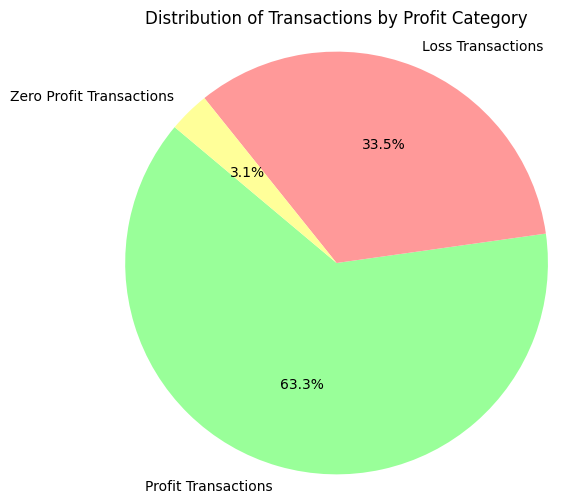

In [ ]:
# Calculate the number of transactions in each category
profit_counts = Profit_transactions.shape[0]
loss_counts = loss_transactions.shape[0]
zero_profit_counts = zero_profit_transactions.shape[0]

# Create labels and sizes for the pie chart
labels = ['Profit Transactions', 'Loss Transactions', 'Zero Profit Transactions']
sizes = [profit_counts, loss_counts, zero_profit_counts]
colors = ['#99ff99', '#ff9999', '#ffff99'] # Light green for profit, light red for loss, light yellow for zero profit

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transactions by Profit Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Quick Insights


  from the dataset , we can interpret that 33.5% of the total sales made gave loss and 3.1% sales resulted into a zero profit .
 this makes me curious about the reasons why over 33% of sales resulted into a loss, for this i would further analyse category wise analysing the data, qunatity



*  Analysis of Sales by Category



In [ ]:
# Group by Category and sum Amount and Profit
category_sales = Data.groupby('Category')[['Amount', 'Profit']].sum().reset_index()

print("Total Amount and Profit by Category:")
display(category_sales)

Total Amount and Profit by Category:


,Category,Amount,Profit
0,Clothing,139054.0,11163.0
1,Electronics,165267.0,10494.0
2,Furniture,127181.0,2298.0


In [ ]:
# let's look at the profit and amount ratio for deciding the best category
category_sales['Profit_Amount_Ratio'] = category_sales['Profit'] / category_sales['Amount']

print("Profit-to-Amount Ratio by Category:")
display(category_sales)

Profit-to-Amount Ratio by Category:


,Category,Amount,Profit,Profit_Amount_Ratio
0,Clothing,139054.0,11163.0,0.080278
1,Electronics,165267.0,10494.0,0.063497
2,Furniture,127181.0,2298.0,0.018069


we can say the best performing category is clothing with the highest return when compared with the electronics, furniture.


let's try to visualize the same

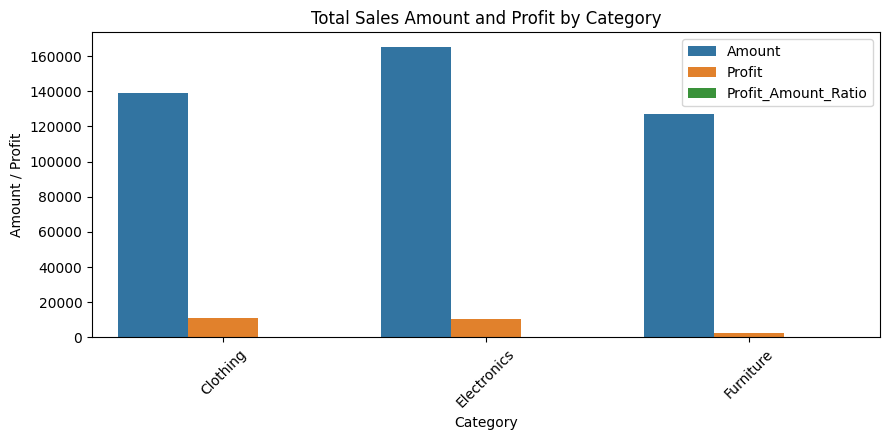

In [ ]:
# Combining Total Amount and Total Profit by Category into a single chart
category_sales_melted = category_sales.melt(id_vars='Category', var_name='Metric', value_name='Value')
# for easier ploting and comparison, combining  both of the amount and total profit.
plt.figure(figsize=(9, 4.5))
sns.barplot(x='Category', y='Value', hue='Metric', data=category_sales_melted)
plt.title('Total Sales Amount and Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount / Profit')
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*here we can clearly see that furniture is the least profit making category.*

# Analysis of sales by category and sub category

In [ ]:
# for better understanding let's analyse the data and look at the sub category wise sales.
sub_category_sales = Data.groupby(['Category', 'Sub-Category'])[['Amount', 'Profit']].sum().reset_index()

print("Total Amount and Profit by Category and Sub-Category:")
display(sub_category_sales)

Total Amount and Profit by Category and Sub-Category:


,Category,Sub-Category,Amount,Profit
0,Clothing,Hankerchief,14608.0,2098.0
1,Clothing,Kurti,3361.0,181.0
2,Clothing,Leggings,2106.0,260.0
3,Clothing,Saree,53511.0,352.0
4,Clothing,Shirt,7555.0,1131.0
5,Clothing,Skirt,1946.0,235.0
6,Clothing,Stole,18546.0,2559.0
7,Clothing,T-shirt,7382.0,1500.0
8,Clothing,Trousers,30039.0,2847.0
9,Electronics,Accessories,21728.0,3559.0


here from the sub categorywise sales we can clearly see the loss making sub categories, that can be removed


1.   tables
2.   electronic games.

but i think checking the categories wth the amount and profit isn't enough for the better insights.i think trying the loss _ transactions along with the category and sub category wise would give a new aparoach, and similarly later lets analyse the zero_ profit transactions, and profit_ transaction.(expectation to find top and bottom performing product categries )


--- Profit Analysis for Furniture ---


/tmp/ipython-input-2968165066.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Profit', data=sub_category_profit, palette='viridis') # Using a different color palette


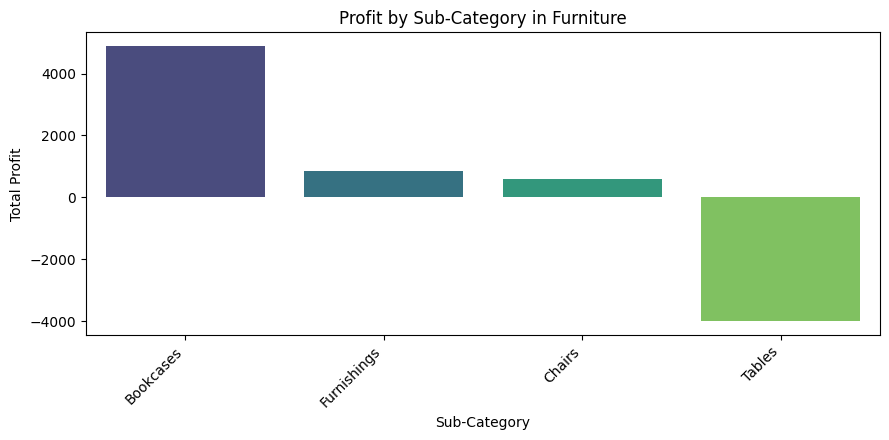



--- Profit Analysis for Clothing ---


/tmp/ipython-input-2968165066.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Profit', data=sub_category_profit, palette='viridis') # Using a different color palette


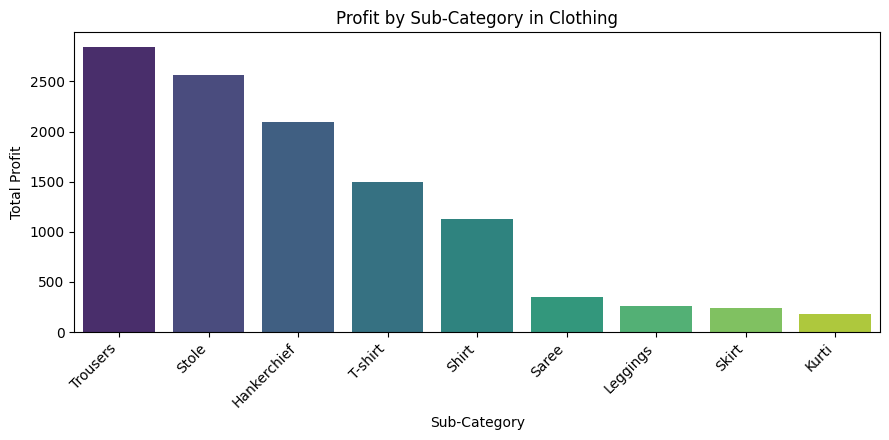



--- Profit Analysis for Electronics ---


/tmp/ipython-input-2968165066.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Profit', data=sub_category_profit, palette='viridis') # Using a different color palette


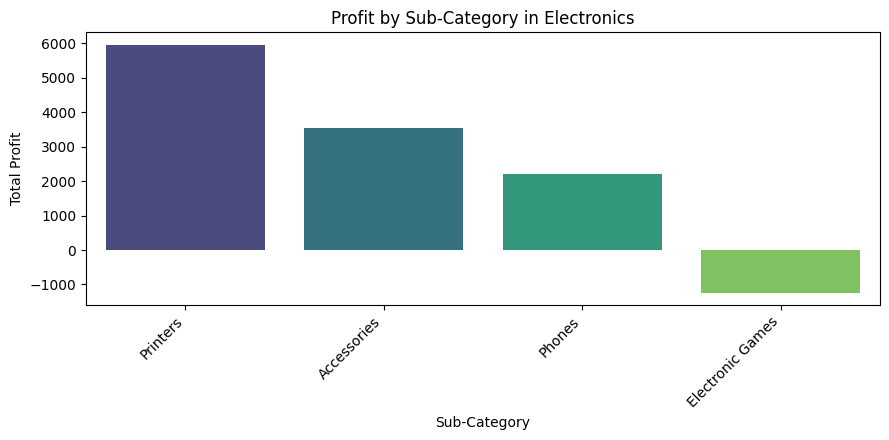

In [ ]:
#lets visualize the data based on the distribution of category and sub categories.
categories = Data['Category'].unique()

# Analyze and visualize profit distribution for each category
for category in categories:
    print(f"--- Profit Analysis for {category} ---")
    # Filter data for the current category
    category_data = Data[Data['Category'] == category]

    # Group by Sub-Category and calculate the sum of Profit
    sub_category_profit = category_data.groupby('Sub-Category')['Profit'].sum().reset_index()

    # Sort the sub-categories by profit in descending order for better clarity in the plot
    sub_category_profit = sub_category_profit.sort_values('Profit', ascending=False)

    # Create a bar plot to visualize profit by sub-category within the current category
    plt.figure(figsize=(9, 4.5)) # Adjust figure size for better readability
    sns.barplot(x='Sub-Category', y='Profit', data=sub_category_profit, palette='viridis') # Using a different color palette
    plt.title(f'Profit by Sub-Category in {category}')
    plt.xlabel('Sub-Category')
    plt.ylabel('Total Profit')
    plt.xticks(rotation=45, ha='right') # Rotate labels and align them to the right
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

    print("\n") # Add a newline for spacing between category outputs

### Sub-Category Analysis within Transaction Types (Loss, Zero Profit, Profit)

Sub-Category distribution within Loss Transactions:


,Sub-Category,Count
0,Saree,98
1,Stole,52
2,Hankerchief,42
3,Phones,41
4,Electronic Games,40
5,Chairs,39
6,Furnishings,30
7,Printers,25
8,Bookcases,22
9,Skirt,18


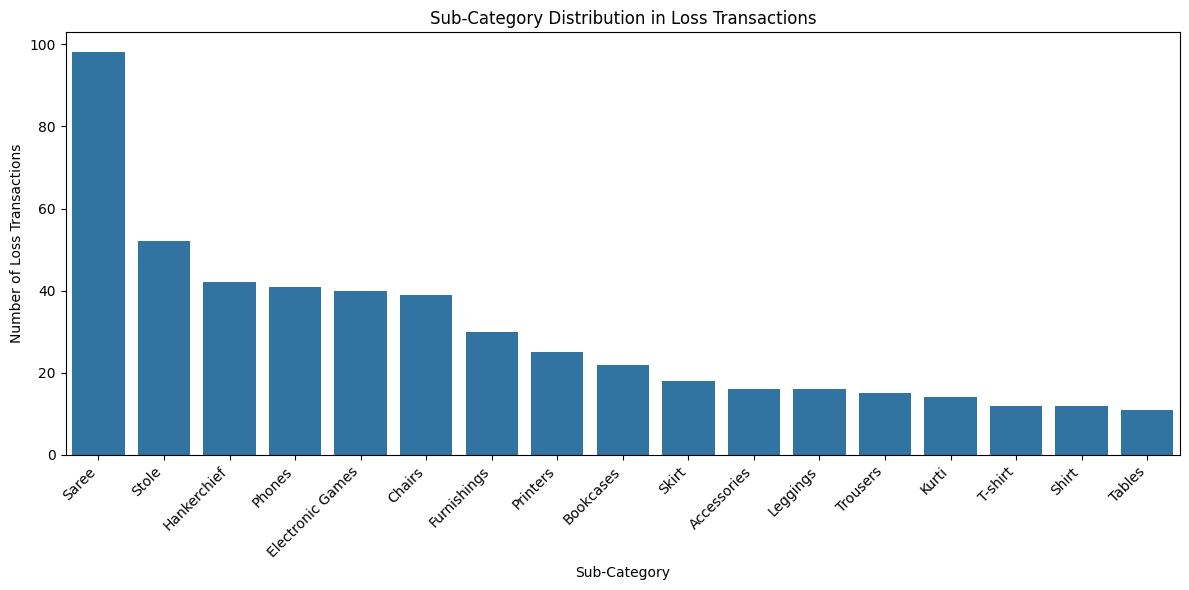

In [ ]:
# Analyze Sub-Categories within Loss Transactions
loss_sub_category_counts = loss_transactions['Sub-Category'].value_counts().reset_index(name='Count')
print("Sub-Category distribution within Loss Transactions:")
display(loss_sub_category_counts)

# Visualize Sub-Categories within Loss Transactions
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Count', data=loss_sub_category_counts)
plt.title('Sub-Category Distribution in Loss Transactions')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Loss Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

findngs: clothing as a category is really nice , but on deeper analysis of the data i found out that among the 33.5% of the loss sales made, major contribution was from the sub categories of clothing, i.e, saree, stole, handkerchief.

And the least profitable category( furniture ) still ranks 6th, 7th, And 17 th
among the loss making sales.  

In [ ]:
# Analyze category, sub category wise profit transactions, loss trasactions
category_sub_category_loss = loss_transactions.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()
category_sub_category_profit = Profit_transactions.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()
category_sub_category_zero_profit = zero_profit_transactions.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()


print("\n category and Sub-Category distribution within profit, loss, and  Zero Profit Transactions:")
display(category_sub_category_loss)
display(category_sub_category_profit)
display(category_sub_category_zero_profit)
#lets look at the numbers and later look at the visualization


 category and Sub-Category distribution within profit, loss, and  Zero Profit Transactions:


,Category,Sub-Category,Profit
0,Clothing,Hankerchief,-973.0
1,Clothing,Kurti,-413.0
2,Clothing,Leggings,-172.0
3,Clothing,Saree,-7034.0
4,Clothing,Shirt,-367.0
5,Clothing,Skirt,-154.0
6,Clothing,Stole,-1287.0
7,Clothing,T-shirt,-192.0
8,Clothing,Trousers,-1401.0
9,Electronics,Accessories,-1307.0


,Category,Sub-Category,Profit
0,Clothing,Hankerchief,3071.0
1,Clothing,Kurti,594.0
2,Clothing,Leggings,432.0
3,Clothing,Saree,7386.0
4,Clothing,Shirt,1498.0
5,Clothing,Skirt,389.0
6,Clothing,Stole,3846.0
7,Clothing,T-shirt,1692.0
8,Clothing,Trousers,4248.0
9,Electronics,Accessories,4866.0


,Category,Sub-Category,Profit
0,Clothing,Hankerchief,0.0
1,Clothing,Kurti,0.0
2,Clothing,Leggings,0.0
3,Clothing,Saree,0.0
4,Clothing,Shirt,0.0
5,Clothing,Skirt,0.0
6,Clothing,Stole,0.0
7,Clothing,T-shirt,0.0
8,Clothing,Trousers,0.0
9,Electronics,Accessories,0.0


.


/tmp/ipython-input-1454779121.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sub-Category', y='Profit', data=sub_category_profit_sorted, palette='coolwarm') # Using a diverging color palette to highlight positive/negative profits


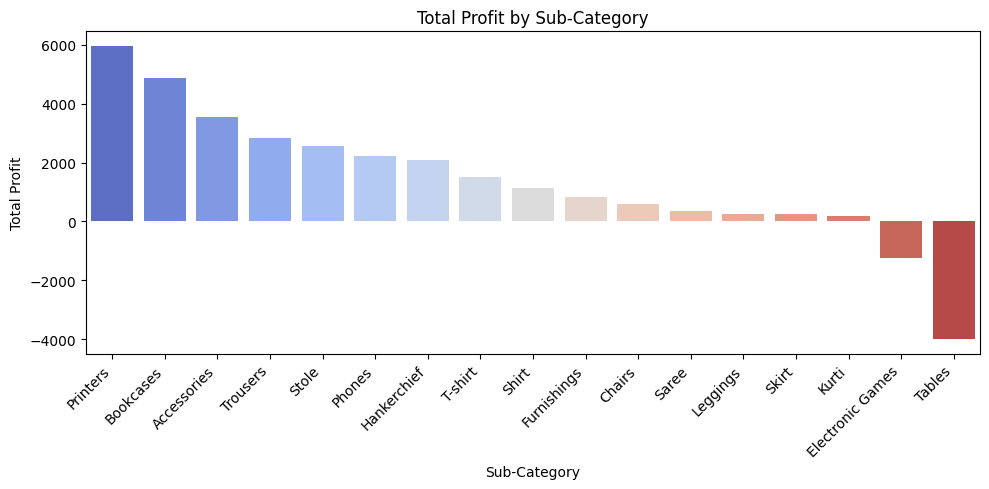

In [ ]:
# Sort  category, and sub-categories by profit for better visualization
''' after the unexpected findings about the loss making sales, i wanted to deep dive into the subcategory
for the further loss and profit analysis of each product/sub category '''

sub_category_profit_sorted = sub_category_sales.sort_values('Profit', ascending=False)

# Create a bar plot of Total Profit by Sub-Category
plt.figure(figsize=(10, 5))
sns.barplot(x='Sub-Category', y='Profit', data=sub_category_profit_sorted, palette='coolwarm') # Using a diverging color palette to highlight positive/negative profits
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()